Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.6/78.2 GB disk)


Export to ONNX models

In [5]:
!python export.py --weights yolov5n.pt --include onnx --opset 12
!python export.py --weights yolov5s.pt --include onnx --opset 12
!python export.py --weights yolov5m.pt --include onnx --opset 12
#!python export.py --weights yolov5l.pt --include onnx --opset 12
#!python export.py --weights yolov5x.pt --include onnx --opset 12

#!python export.py --weights yolov5n.pt --include onnx --imgsz 320 320 --opset 12

export: data=data/coco128.yaml, weights=['yolov5n.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CPU

100% 3.87M/3.87M [00:00<00:00, 282MB/s]

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients

PyTorch: starting from yolov5n.pt with output shape (1, 25200, 85) (3.9 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export success ✅ 0.7s, saved as yolov5n.onnx (7.6 MB)

Export complete (2.1s)
Results saved to /content/yolov5
Detect:          python detect.py --weights yolov5n.onnx 
Validate:        python val.py --weights yolov5n.onnx 
PyTorch Hub:     model = torch.hub.load('ultralytics/yolov5', 'custom', 'yolov5n.onnx')  
Visualize:       https:/

Test models

detect: weights=['yolov5n.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Loading yolov5n.onnx for ONNX Runtime inference...
image 1/2 /content/yolov5/data/images/bus.jpg: 640x640 3 persons, 1 bus, 16.7ms
image 2/2 /content/yolov5/data/images/zidane.jpg: 640x640 2 persons, 1 tie, 17.1ms
Speed: 2.8ms pre-process, 16.9ms inference, 11.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


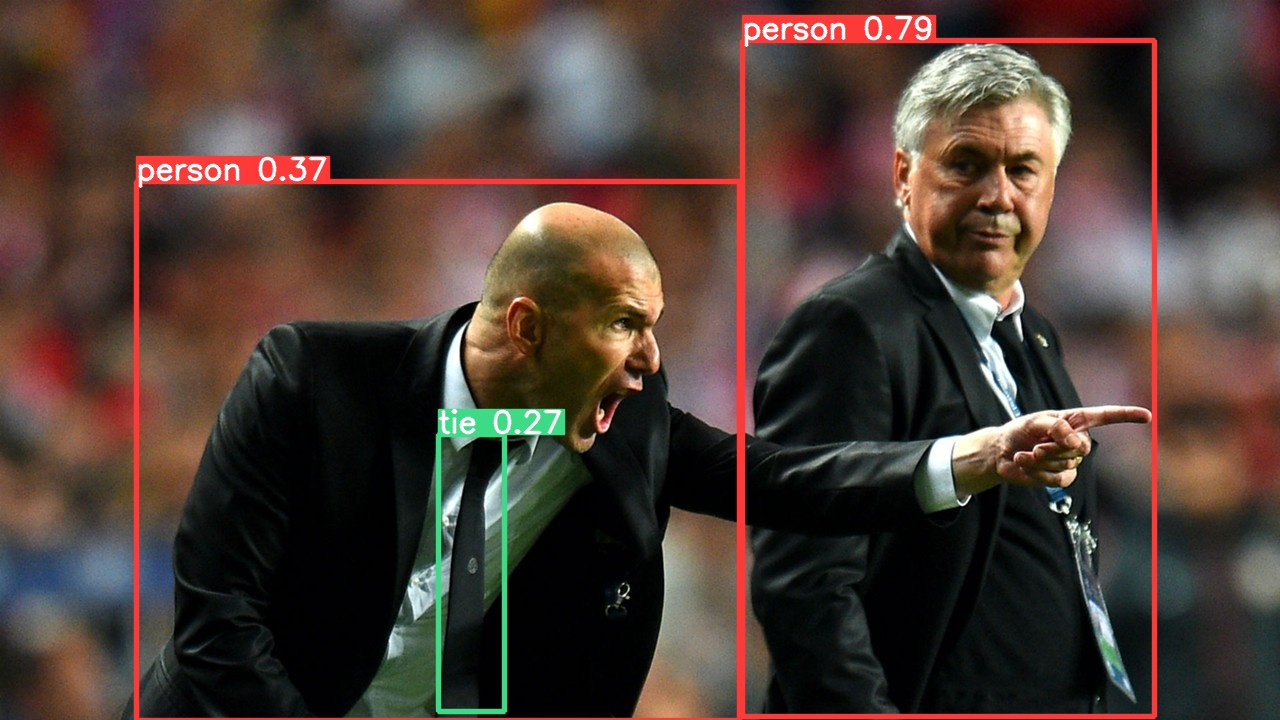

In [6]:
!python detect.py --weights yolov5n.onnx --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)